<a href="https://colab.research.google.com/github/M-Adonay/Programacion_III/blob/main/Clasificaci%C3%B3n_de_Im%C3%A1genes_Tienda_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de Imágenes - Tienda de Ropa**

uso de tensorflow para entrenar una red neuronal que aprenda a reconocer ropa

In [4]:
#Importar las librerias
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#cargamos en dataset de entrenamiento y prueba, los numeros del 0-9
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True,with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"],dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFY0ZDU/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFY0ZDU/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
tags = ["Camiseta / top","Pantalón","Pull-over","Vestido","Abrigo","Sandalia","Camisa","Zapatilla","Bolso","Botín"]

In [7]:
#pasamos en variables los datos de ejemplo de entrenamiento y prueba
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [8]:
#vamos a pasar los numeros(pixeles) que van de 0 - 255 de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [9]:
#Llamamos nuestra imagen normalizadora para convertir los numeros(pixeles) de 0 - 255 sean de 0 - 1
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [10]:
#crear la estructura de nuestra red neuronal
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape= (28,28,1)), #28*28 neuronas una para cada pixel
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #10 neuronas una para cada numero
])

In [11]:
#compilamos nuestro modelo
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
#realizaremos el entrenamiento por lote
batchsize= 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize) #ordenado de forma aleatoria
datos_prueba = datos_prueba.batch(batchsize)

In [13]:
#hacemos el entrenamiento de nuestra red neuronal con los datos de entrenamiento
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize)) 

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5105 - accuracy: 0.8193
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3814 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3386 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3233 - accuracy: 0.8809
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3032 - accuracy: 0.8874


In [14]:
#evaluar nuestro modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print(test_loss*100, test_accuracy*100)

313/313 [==============================] - 2s 5ms/step - loss: 0.3476 - accuracy: 0.8757
34.76106822490692 87.56999969482422


In [15]:
#graficar la salida para evaluar el aprendizaje
def graficar_images(i,predictions_array, true_labels, images):
  predictions_array, true_labels,img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "purple"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(tags[predicted_label]), color=color)

In [16]:
#convertir las imagenes de tensores en matrices con numpy
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [17]:
#graficar las matrices en imganes con matplotlib para ver su acierto
def graficar_valores_matrices(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("purple")

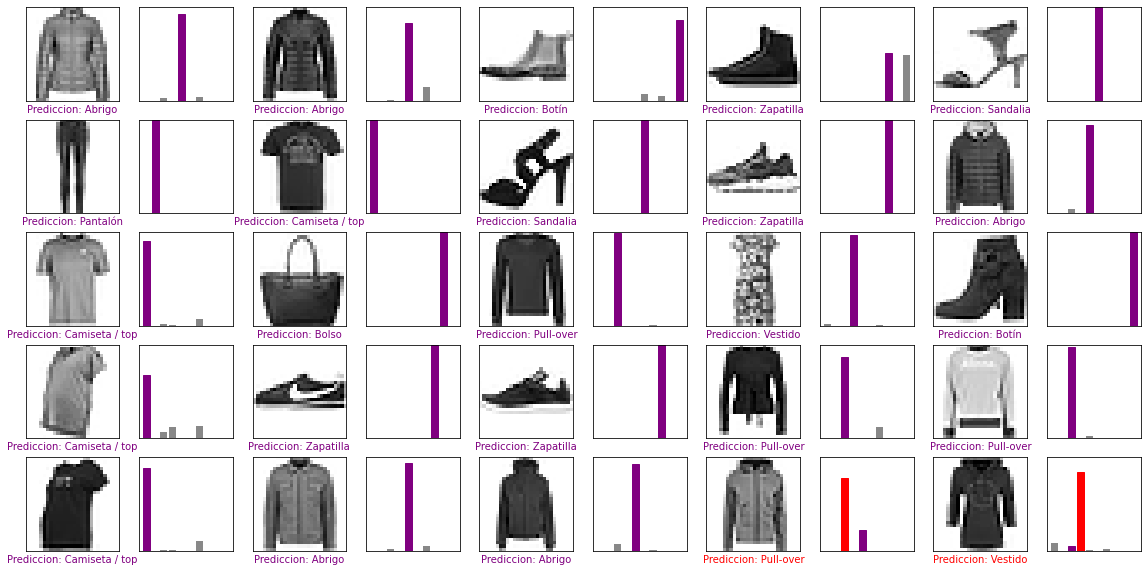

In [18]:
#llamamos los metodos para la graficacion de las imagenes y la grafica de barras
numfilas = 5
numcols = 5
numimages = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimages):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_images(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matrices(i, predicciones, etiquetas_prueba)

plt.show()

In [143]:
import cv2
#insertar imagen
imglocal = cv2.imread('/content/Botin.jpg', 0)
imglocal = tf.cast(imglocal, tf.float32)
imglocal = imglocal / 255
imglocal = np.expand_dims(imglocal, axis=0)

print(imglocal.shape)

(1, 28, 28)


In [144]:
#Entrenar
prdlocal = modelo.predict(imglocal, batch_size=1)
tagLocalTest = np.argmax(prdlocal)

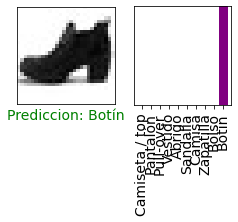

In [145]:
#Imprimir
columns = 2
rows = 2
plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imglocal[0,...], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(tags[tagLocalTest]), color='green')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), prdlocal[0], color = "#888888")
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("purple")
plt.xticks(range(10), tags, rotation=90)

plt.rcParams['font.size'] = 14
plt.show()